# Exercises Lesson 08: Optimization

## Exercise 1: Gradient Descent

1. Define as follows a `grad` method  that computes the numerical derivative of a generic function. 
    `grad` accepts 3 arguments, `f`, `x`, `eps`, where `f` is a function, `x` a numpy array, and `eps` is 
    a small number that defaults to `1e-10`. 
    The `grad` method should return a numpy array `g` containing a numerical 
    approximation of the gradient. 

2. Test `grad` on the 2d `rosenbrock` function:

    ```python
    def rosenbrock(x, a=1, b=100):
        return (a-x[0])**2 + b*(x[1]-x[0]**2)**2

    grad(rosenbrock, x)
    ```

3. Define a function returning the analytic gradient. Compare the numerical gradient with the analytic one.


4. Choose a learning rate `eta` and perform gradient descent on the rosenbrock function:

    ```python 
    g = grad(rosenbrock, x[t])
    x[t+1] = x[t] - eta*g # this won't work 
                        # with list, just pseudocode.
                        # it would work with numpy's arrays
    ```

    - As a stopping criterion you should use a maximum number of iteration
        `tmax`. 
    - On top of that, stop the iterations if the displacement
        `norm` is smaller than some value `eps` (use `np.linalg.norm`).

5. Every `infotime` iterations, save the current position and the current value of 
   the loss in one or more lists (e.g. `x0s`, `x1s` and `losses`)

6. Compare GD on the numerical derivative with GD on analytic
   one. Do you observe a degradation in performance when using the
   numeric one?

7. Plot the the trajectory of the gradient descent. You can find useful the following snippet:

    ```python
    import matplotlib.pyplot as plt
    import numpy as np
    from IPython import display
    %matplotlib inline

    def plot_contour(f, ax, *, xmin=-0.1, xmax=1.5, ymin=-0.1, ymax=2.1):
        n = 200 # number of discretization points 

        
        X,Y = np.meshgrid(np.linspace(xmin,xmax,n), 
                        np.linspace(ymin,ymax,n))
        
        Z  = f([X, Y])
        cs = ax.contour(X,Y,Z, np.logspace(-1, 10, 12))
        ax.clabel(cs, inline=1, fontsize=10);
        
    fig, ax = plt.subplots(figsize=(12,8))
    plot_contour(rosenbrock, ax)
    ```

8. Explore with different learning rates, starting points and stopping criterions.

In [16]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from IPython import display
%matplotlib inline

def rosenbrock(x, a=1, b=100):
        return (a-x[0])**2 + b*(x[1]-x[0]**2)**2
        #return x[0]**2 + x[1]**2

x = np.arange(2)
g = rosenbrock(x)   

def grad(f, x, eps = 1e-10):
        grad = np.zeros(x.shape)
        f0 = f(x)
        for i in range(len(x)): 
                x_new = np.array(x, dtype= float)
                x_new[i] = x[i] + eps
                grad[i] = (f(x_new) - f0)/eps                    
        return grad

def analyticgrad(x): 
        return np.array([-2*(1-x[0]) -2*100*(x[1] -x[0]**2)*2*x[0], 2*100*(x[1] - x[0]**2)] )

print(f'x input: {x}, numerical gradient: {grad(rosenbrock, x)}, analytical gradient: {analyticgrad(x)}')


def grad_descentanalytic(start, eta, tmax, eps = 0.0001 ) : 
        x0s = [] 
        x1s = []
        loss = []
        x = start
        for t in range(tmax):                
                diff = eta*analyticgrad(x)
                if np.linalg.norm(diff) < eps: 
                        break  
                x = x - diff
                x0s.append(x[0])
                x1s.append(x[1])
                loss.append(diff)
        return x

def grad_descentnumeric(start, f, eta, tmax, eps = 0.00001 ) : 
        x = np.zeros((tmax,2))
        x[0] = start
        x0s = [] 
        x1s = []
        loss = []       
        time = 0
        for t in range(tmax -1):    
                time = t        
                diff = eta*grad(f,x[t])   
                if np.linalg.norm(diff) < eps: 
                        break  
                x[t+1]= x[t] -diff
                x0s.append(x[t,0])
                x1s.append(x[t,1])
                loss.append(diff)
        return x[time]

grad_desc_anal = grad_descentanalytic(np.arange(2), 0.001, 5000)
grad_desc_num = grad_descentnumeric(np.arange(2), rosenbrock, 0.001, 5000) 
print( f'analytic gradient descent: {grad_desc_anal}, numerical gradient descent: {grad_desc_num}' )



x input: [0 1], numerical gradient: [0. 0.], analytical gradient: [ -2 200]
analytic gradient descent: [0.89730118 0.80471246], numerical gradient descent: [0.95637907 0.91448174]


## Exercise 2: Nesterov Optimizer

The Nesterov accelerated gradient descent 
is a momentum based optimizer wich provides faster rates of convergence compared to standard gradiend descent. 

Momentum methods have a *physical* interpretation 
where the *force* induces a change in *velocity*
(Newton's second law) and the *velocity* produces
a change in *position*. 

The Nesterov scheme reads:
$$ v^t = m v^{t-1} - \eta\,g(x^{t-1}) $$
and
$$ x^t = x^{t-1} - m v^{t-1} + (1+m) v^{t}$$

- Reproduce the steps from previous exercise using the new scheme

- Compare the two methods, by plotting the loss
  vs the iteration number for GD and Nesterov. 

- Experiment with using logarithmic scaling for one or both the axis to obtain a better visualization.

In [17]:
def nesterov_optimizer(start, f, eta, m, tmax, eps = 0.0001): 
        x = np.zeros((tmax,2))
        v= np.zeros((tmax,2))
        x[0] = start
        v[0] = 0     
        time = 0
        for t in range(1,tmax):    
                time = t       
                v[t] = m*v[t-1] - eta*grad(f,x[t-1])
                #if np.linalg.norm(eta*grad(f,x[t-1])) < eps: 
                  #      return x[time]  
                x[t]= x[t-1] - m*v[t-1] + (1+m)*v[t]
        return x[time]

nesterov = nesterov_optimizer(np.arange(2), rosenbrock, 0.001, 0.9, 2000)
print(f'Nesterov : {nesterov}, loss of GD: {rosenbrock(grad_desc_num)}, loss of Nesterov: {rosenbrock(nesterov)}', rosenbrock(nesterov) < rosenbrock(grad_desc_num))

Nesterov : [0.99992427 0.99984824], loss of GD: 0.0019059961226171086, loss of Nesterov: 5.744283053580746e-09 True


## Exercise 3 : Newton Method

Newton method is a second order optimization, that is, it makes use of the information contained in the second derivatives of the function at each iteration.

At iterations $t$, define the matrix $H^t$ as the Hessian matrix at point $x^{t}$:

$$(H^t)_{ij} = \frac{\partial^2 f}{\partial x_i \partial x_j} (x^t)$$


The Newton update to the current position according reads:

$$ x^{t+1} = x^{t} - \eta\, (H^t)^{-1} g^t$$

In last expression $g^t$ is the gradient at time $t$ and $(H^t)^{-1}$ is the inverse of the Hessian. The natural value for the learning rate $\eta$ is 1.  

Implement Newton method for the Rosenbrock 2d function as follows:

- define a function `hessRosenbrock(x,, a=1, b=100)` which returns the  analytic Hessian of the Rosenbrock function at position `x`
  in the form of numpy matrix.
- Import the functions `matmul`, `inv` and `norm` from `numpy`.
  Check their docstring.
- Implement Newton's update rules, using the analytic gradient,
  analytic Hessian and learning rate 1. 
- check the convergence of Newton's iterations starting from point `x=[0, 2]`.

In [18]:
from numpy import matmul
from numpy import linalg

def hessRosenbrock(x,a=1,b=100):
    return np.matrix([[8*b*x[0]**2 - 4*b*(x[1]-x[0]**2)+2,-4*b*x[0]],[-4*b*x[0],2*b]])

def newton_optimizer(start, eta, tmax): 
        x = np.zeros((tmax,2))
        x[0] = start    
        time = 0
        for t in range(tmax-1):   
                time = t   
                learn_rate = eta*np.matmul(np.linalg.inv(hessRosenbrock(x[t])) , analyticgrad(x[t]))
                x[t+1]= x[t] - learn_rate
        return x[time]

newton_optimizer(np.array([0,2]), 1, 10)

array([1., 1.])

## Exercise 4: Newton Method (numerical Hessian)

Implent a method, `hessian(f, x, eps=1e-10)`, that computes
the Hessian by finite differences. Repeat the 
previous exercise using the numerical hessian. 

In [19]:
def hessian(f,x, eps=1e-10): 
    grad = np.zeros(x.shape)
    hess = np.zeros((x.shape,x.shape))
    for i in range(len(x)): 
            x_new = np.array(x, dtype= float)
            x_new[i] = x[i] + eps
            grad[i] = (f(x_new) - f(x))/eps   
    return grad



## Plotting

Here plot the different methods used and underline the differences. 

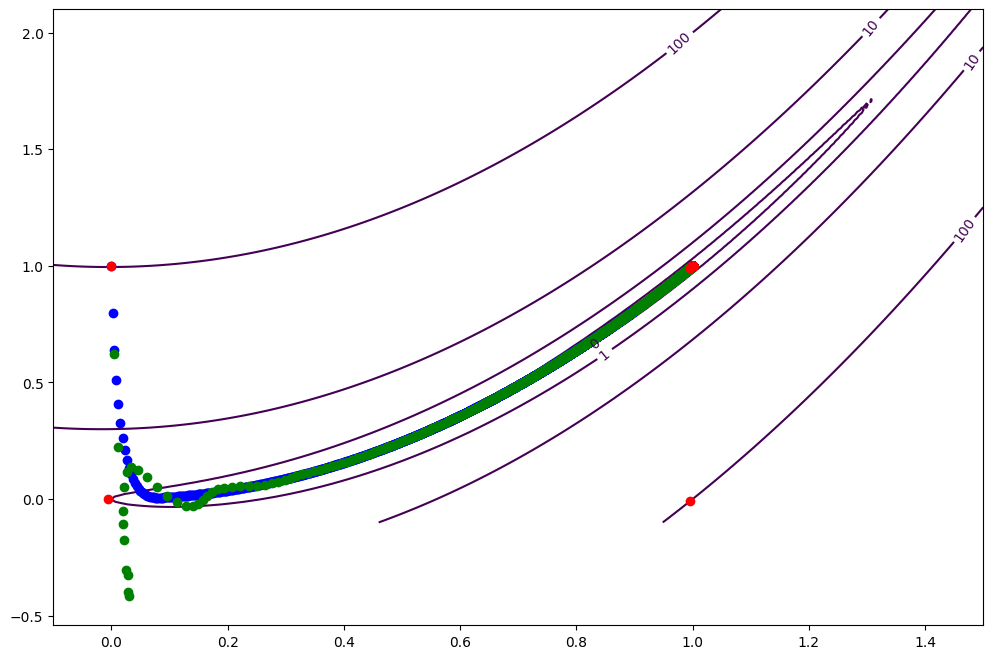

In [24]:
def gradientdescent_track(start, f, eta, tmax, eps = 0.0001 ) : 
        x = np.zeros((tmax,2))
        x[0] = start
        iterations = []
        function_value = []  
        x_track = []    
        time = 0
        for t in range(tmax -1):    
                time = t   
                x_track.append(x[t])  
                iterations.append(t)  
                function_value.append(rosenbrock(x[t])) 
                diff = eta*grad(f,x[t])   
                if np.linalg.norm(diff) < eps: 
                        break  
                x[t+1]= x[t] -diff        
        return x_track

def nesterov_track(start, f, eta, m, tmax, eps = 0.0001): 
        x = np.zeros((tmax,2))
        v= np.zeros((tmax,2))
        xn_track = []
        x[0] = start
        v[0] = 0     
        time = 0
        for t in range(1,tmax):   
                xn_track.append(x[t]) 
                time = t       
                v[t] = m*v[t-1] - eta*grad(f,x[t-1])
                x[t]= x[t-1] - m*v[t-1] + (1+m)*v[t]
        return xn_track

def newton_track(start, eta, tmax): 
        x = np.zeros((tmax,2))
        x[0] = start 
        xnewton_track = []   
        time = 0
        for t in range(tmax-1): 
                xnewton_track.append(x[t])  
                time = t   
                learn_rate = eta*np.matmul(np.linalg.inv(hessRosenbrock(x[t])) , analyticgrad(x[t]))
                x[t+1]= x[t] - learn_rate
        return xnewton_track

#plotting

def plot_contour(f, ax, *, xmin=-0.1, xmax=1.5, ymin=-0.1, ymax=2.1):
        n = 200 # number of discretization points 
        X,Y = np.meshgrid(np.linspace(xmin,xmax,n), 
                np.linspace(ymin,ymax,n))
        Z  = f([X, Y])
        cs = ax.contour(X,Y,Z, np.logspace(-1, 10, 12))
        ax.clabel(cs, inline=1, fontsize=10);

fig, ax = plt.subplots(figsize=(12,8))
plot_contour(rosenbrock, ax)
#plot minimum 
plt.plot(grad_desc_num[0], grad_desc_num[1], 'ro')

#plot gradient descent
x_track = gradientdescent_track(np.arange(2), rosenbrock, 0.001, 4000)
for t in range(len(x_track)):        
        plt.plot(x_track[t][0], x_track[t][1],  'bo')

#plot nesterov optimizer
xn_track = nesterov_track(np.arange(2), rosenbrock, 0.001, 0.9, 2000)
for t in range(len(xn_track)):        
        plt.plot(xn_track[t][0], xn_track[t][1], 'go')

#plot newton optimizer
xnewton_track = newton_track(np.arange(2), 1, 100)
for t in range(len(xnewton_track)):        
        plt.plot(xnewton_track[t][0], xnewton_track[t][1], 'ro')